# Using TensorFlow to Predict Diabetes Results

My student notes from this course: https://www.udemy.com/complete-guide-to-tensorflow-for-deep-learning-with-python

This workbook will pull in health related data collected from a population.  The data has indicators of those who have been diagnosed with Diabetes and those who are not Diabetic.  

Using Deep Learning / Machine Learning, with TensorFlow, two different models will be used to try and predict diabetics based on health demographic data.  

The two models used will be:
   - Linear Regression
   - Deep Nueral Networks

Models will be reviewed for accuracy.

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## Loading Data
For this work, we're using a CSV flat file (it could be a MySQL db, etc., but for the course, we're using a simple CSV.)  

In [4]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
# Checking loaded file via pandas head()
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


## Normalizing Data
For the learning process, we need to normalize the data.  Values such as "Number_pregnant" will throw off the calcuations.  Also, some columns are categorical and will need to be setup correctly, in order to be utilized (columns such as "Group" which has categories of A, B, C, D.)

In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [9]:
# Above, we applied a lambda function to normalize the values using x - x.min() / (x.max() - x.min())
# Rechecking the head of the file, the data is now normalized:

diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


## Create Feature and Numeric Columns (from data columns)

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

## Setting Up the Categorical Column (Group)

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

### Hash Buckets
As an alternative to the above categorical assignment, we can also use Hash Buckets. These are useful if the categories are too numerous to identify.

The way this works, is that a limit is supplied (i.e. 120) and if all the unique categories are within that range, it will auto add them in as categorical in nature.  This is useful for something like Shark Species, or Countries (where there are too many values to indeitify one by one.)  

Example: 

assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10) 

## Converting Continuous Columns to Categorical
Some situations might make more sense if the data was categorical (even though it's continuous.)  An example might be height, or age.  You might prefer the data to be broken into groups (categories) where the data isn't a continuous stream of values, but rather heights by 45 inches, 55 inches, 65 inches, etc.

Below, we'll be converting the Age column to categories of age groups:

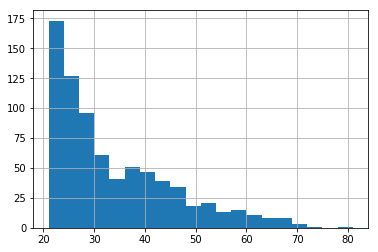

In [12]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])
# The above will take the data and segment it into categorical buckets (20, 30, 40, 50, 60, 70, 80)

# Training / Testing the Linear Model

Training will train the ML/DL system  with known results.  
The model will be tuned by the trianing process.  
Then the same model is applied to a test set of data (with known results) and the test data is evaluated to see how accurate the ML/DL system is.  

In [15]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, assigned_group, age_bucket]

In [16]:
# Now that all features have been setup, we need to do a train/test split of the data:
x_data = diabetes.drop('Class', axis=1)
x_data.head()
# Removes Class from the features to train/test
# Class will be set up as a Label

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
labels = diabetes['Class']

## Splitting Data (training/testing) with Sklearn

In this example, the data will be split into a test size of 0.3 (30%), the random_state is a seed used to match the instructors output.  Not necessary in real world testing.  

We are setting four variables: X_train, X_test, y_train, y_test from our data (x_data), using the labels and appropriate test size split percentage.  

Scikit Cheatsheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

## TensorFlow Estimators
Reference: https://www.tensorflow.org/programmers_guide/estimators 

In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000,shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmprfhx224v'}


In [22]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmprfhx224v/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 287.924
INFO:tensorflow:step = 101, loss = 6.20723 (0.349 sec)
INFO:tensorflow:global_step/sec: 307.386
INFO:tensorflow:step = 201, loss = 5.56694 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.015
INFO:tensorflow:step = 301, loss = 6.38859 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.31
INFO:tensorflow:step = 401, loss = 4.40197 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.673
INFO:tensorflow:step = 501, loss = 5.93602 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.454
INFO:tensorflow:step = 601, loss = 4.04763 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.736
INFO:tensorflow:step = 701, loss = 5.20189 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.777
INFO:tensorflow:step = 801, loss = 5.21499 (0.327 sec)
INFO:tensorflow:global_step/s

### Evaluation of Model
TensorFlow's estimator API, lets us run through training, evaluation, prediction and exporting.  In the next logical step, we'll be evaluating the model, to get a sense of its accuracy. 

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1,shuffle=False)
# Notes: we only run this one time (num_epochs = 1) and we set shuffle to false, since we want to run in the same order.



In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-12-19:36:09
INFO:tensorflow:Restoring parameters from /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmprfhx224v/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-12-19:36:10
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.801317, auc_precision_recall = 0.645307, average_loss = 0.528499, global_step = 1000, label/mean = 0.350649, loss = 5.0868, prediction/mean = 0.391848


The accuracy of the model is 0.735931 (73.5%)

### Predictions Using TensorFlow

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,shuffle=False)

In [26]:
predictions = model.predict(pred_input_func)

In [27]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmprfhx224v/model.ckpt-1000


In [28]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54911494], dtype=float32),
  'logits': array([ 0.19709527], dtype=float32),
  'probabilities': array([ 0.45088509,  0.54911494], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.6626699], dtype=float32),
  'logits': array([ 0.67521489], dtype=float32),
  'probabilities': array([ 0.33733013,  0.6626699 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40117261], dtype=float32),
  'logits': array([-0.40058172], dtype=float32),
  'probabilities': array([ 0.59882742,  0.40117258], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.37583435], dtype=float32),
  'logits': array([-0.50726736], dtype=float32),
  'probabilities': array([ 0.62416565,  0.37583435], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

## Dense Neural Network
Instead of the Linear model used above, this next section will cover the use of a Dense Neural Network (DNN.)

In [29]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)
# The hidden units value is referencing the amount of hidden layers and nodes we want. 
# above 10,10,10 means 3 hidden layers with 10 nodes each.
# Any model with 3+ Hidden Layers is considered a "deep" network

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmp80tul710'}


### DNN Playground
To better conceptualize DNN's, you can check out the simulated one at:
http://playground.tensorflow.org

In [30]:
# The DNN is going to error on categorical column data.  
# To resolve, use the following format:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [31]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, embedded_group_col, age_bucket]

# Note: 'group' was removed and replaced with the embedded_group_col variable made inthe previous step.

In [32]:
input_fuc = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmp_o17hspp'}


In [34]:
dnn_model.train(input_fn=input_fuc, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmp_o17hspp/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.4899
INFO:tensorflow:global_step/sec: 351.561
INFO:tensorflow:step = 101, loss = 4.0249 (0.285 sec)
INFO:tensorflow:global_step/sec: 379.674
INFO:tensorflow:step = 201, loss = 4.78711 (0.263 sec)
INFO:tensorflow:global_step/sec: 378.917
INFO:tensorflow:step = 301, loss = 2.99536 (0.264 sec)
INFO:tensorflow:global_step/sec: 381.497
INFO:tensorflow:step = 401, loss = 6.62068 (0.262 sec)
INFO:tensorflow:global_step/sec: 381.467
INFO:tensorflow:step = 501, loss = 5.42894 (0.262 sec)
INFO:tensorflow:global_step/sec: 376.163
INFO:tensorflow:step = 601, loss = 2.99129 (0.266 sec)
INFO:tensorflow:global_step/sec: 383.879
INFO:tensorflow:step = 701, loss = 4.671 (0.261 sec)
INFO:tensorflow:global_step/sec: 379.741
INFO:tensorflow:step = 801, loss = 3.70446 (0.263 sec)
INFO:tensorflow:global_step/sec:

## Evaluating the DNN Model

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10,num_epochs=1, shuffle=False)

In [36]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-12-19:42:31
INFO:tensorflow:Restoring parameters from /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmp_o17hspp/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-12-19:42:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.825597, auc_precision_recall = 0.669678, average_loss = 0.496634, global_step = 1000, label/mean = 0.350649, loss = 4.7801, prediction/mean = 0.329932


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82559669,
 'auc_precision_recall': 0.66967803,
 'average_loss': 0.49663374,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7800999,
 'prediction/mean': 0.3299323}

### Results
In the DNN output above, the accuracy came out to 0.74891776 (74.8%) - This is higher than the previous model, but only by a little bit.  We can try modifying the DNN setup to add in more hidden layers and neural nodes.

For a highlevel on Hidden Layers and Nodes, see my post: 

http://vizdata.io/forward-propagation-deep-learning/

## Updating the DNN from 3 Layers of 10 nodes, to 5 layers of 10-20 nodes

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmpw92f3vee'}


In [46]:
dnn_model.train(input_fn=input_fuc, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmpw92f3vee/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.95385
INFO:tensorflow:global_step/sec: 324.392
INFO:tensorflow:step = 101, loss = 5.34596 (0.309 sec)
INFO:tensorflow:global_step/sec: 337.449
INFO:tensorflow:step = 201, loss = 6.50001 (0.296 sec)
INFO:tensorflow:global_step/sec: 344.894
INFO:tensorflow:step = 301, loss = 5.97999 (0.290 sec)
INFO:tensorflow:global_step/sec: 341.699
INFO:tensorflow:step = 401, loss = 6.38178 (0.293 sec)
INFO:tensorflow:global_step/sec: 344.666
INFO:tensorflow:step = 501, loss = 4.39696 (0.290 sec)
INFO:tensorflow:global_step/sec: 352.851
INFO:tensorflow:step = 601, loss = 3.88213 (0.283 sec)
INFO:tensorflow:global_step/sec: 350.464
INFO:tensorflow:step = 701, loss = 4.54291 (0.285 sec)
INFO:tensorflow:global_step/sec: 354.998
INFO:tensorflow:step = 801, loss = 4.36404 (0.282 sec)
INFO:tensorflow:global_step/

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10,num_epochs=1, shuffle=False)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-12-19:48:52
INFO:tensorflow:Restoring parameters from /var/folders/dd/lxyx_qy52b370zygl1dl80zjnpgqvn/T/tmpw92f3vee/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-12-19:48:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.812551, auc_precision_recall = 0.680332, average_loss = 0.532874, global_step = 1000, label/mean = 0.350649, loss = 5.12891, prediction/mean = 0.376509


{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81255144,
 'auc_precision_recall': 0.68033189,
 'average_loss': 0.53287393,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1289115,
 'prediction/mean': 0.37650901}

# Results

The Neural Nodes and hidden layers can be played around with to try and get a better fit.  What I found, was that adding more layers and nodes to this particular problem, resulted in a worse over all score.  

# References Used

Course notes were taken from <b>Jose Portilla's</b> Udemy course on Deep Learning with TensorFlow: 

https://www.udemy.com/complete-guide-to-tensorflow-for-deep-learning-with-python/

## About
I'm a student of Data Science, Python, Tableau, Visualizations, QA, Software Dev. 

For more info on my learning paths, projects and interests at:

http://sdet.us

http://vizdata.io